In [60]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import GridSearchCV


In [61]:
#Loading the data
ob1 = pd.read_excel('EXP-00004-Master.xlsx')
ob2 = pd.read_excel('EXP-00005-Master.xlsx')
ob3 = pd.read_excel('EXP-00006-Master.xlsx')

In [62]:
#Seeing what each dataset looks like
print('Obsidian 1 summary', ob1.describe())
print('Obsidian 2 summary', ob2.describe())
print('Obsidian 3 summary', ob3.describe())

Obsidian 1 summary            Id  Img Id         Da         Dp     FWidth    FLength  FThickness  \
count   36682   36682  36682.000  36682.000  36682.000  36682.000   36682.000   
unique  23382   13450   2642.000   3246.000   2691.000   4285.000    1412.000   
top         9   11917      0.385      0.429      0.365      0.849       0.132   
freq        5      14    117.000     87.000    107.000     47.000     253.000   

          ELength  EThickness     EWidth  ...  L/W Ratio  W/L Ratio  \
count   36682.000   36682.000  36682.000  ...  36682.000  36682.000   
unique   4235.000    1404.000   2659.000  ...   3259.000    791.000   
top         0.714       0.129      0.322  ...      1.418      0.556   
freq       52.000     250.000    111.000  ...     53.000    117.000   

        W/T Ratio  T/W Ratio  CHull Surface Area      Sieve  Angularity  \
count       36682      36682           36682.000  36682.000       36682   
unique       4433        872            7416.000   2036.000        49

In [63]:
#Setting what stage in the tool-making process each dataset is in
ob1['Stage'] = 4
ob2['Stage'] = 5
ob3['Stage'] = 6

#Merging the three datasets together
df = pd.concat([ob1, ob2, ob3])

df

,Id,Img Id,Da,Dp,FWidth,FLength,FThickness,ELength,EThickness,EWidth,...,W/L Ratio,W/T Ratio,T/W Ratio,CHull Surface Area,Sieve,Angularity,Ellipticity,Fiber Length,Fiber Width,Stage
0,,,mm,mm,mm,mm,mm,mm,mm,mm,...,,,,mm²,mm,,,mm,mm,4
1,5903,14271,0.101,0.255,0.167,0.257,0.167,0.234,0.106,0.106,...,0.652,1,1,0.097,0.167,88.889,2.216,0.38,0.021,4
2,3002,11576,0.072,0.241,0.127,0.203,0.127,0.157,0.081,0.081,...,0.624,1,1,0.068,0.127,87.5,1.942,0.367,0.011,4
3,9893,18211,0.077,0.199,0.13,0.172,0.13,0.114,0.1,0.1,...,0.758,1,1,0.053,0.13,81.667,1.139,0.297,0.016,4
4,3713,12265,0.127,0.381,0.161,0.35,0.161,0.413,0.112,0.112,...,0.459,1,1,0.168,0.161,72.381,3.686,0.563,0.022,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17417,3074,7764,0.314,0.425,0.373,0.749,0.125,0.729,0.125,0.341,...,0.498,2.978,0.336,0.337,0.249,58.235,5.814,0.675,0.112,6
17418,2128,4357,0.497,0.687,0.632,0.782,0.125,0.793,0.102,0.59,...,0.808,5.049,0.198,0.894,0.379,64.375,7.805,1.296,0.222,6
17419,1557,4062,0.124,0.177,0.125,0.178,0.125,0.165,0.107,0.107,...,0.705,1,1,0.065,0.125,68,1.542,0.225,0.054,6
17420,780,3607,0.581,0.727,0.627,0.939,0.125,0.894,0.118,0.599,...,0.667,5.009,0.2,1.15,0.376,61.034,7.565,1.027,0.346,6


In [64]:
#Removing unnecessary column and re-indexing
df.drop(index = 0, inplace = True)
df.reset_index(drop = True, inplace = True)
df

,Id,Img Id,Da,Dp,FWidth,FLength,FThickness,ELength,EThickness,EWidth,...,W/L Ratio,W/T Ratio,T/W Ratio,CHull Surface Area,Sieve,Angularity,Ellipticity,Fiber Length,Fiber Width,Stage
0,5903,14271,0.101,0.255,0.167,0.257,0.167,0.234,0.106,0.106,...,0.652,1,1,0.097,0.167,88.889,2.216,0.38,0.021,4
1,3002,11576,0.072,0.241,0.127,0.203,0.127,0.157,0.081,0.081,...,0.624,1,1,0.068,0.127,87.5,1.942,0.367,0.011,4
2,9893,18211,0.077,0.199,0.13,0.172,0.13,0.114,0.1,0.1,...,0.758,1,1,0.053,0.13,81.667,1.139,0.297,0.016,4
3,3713,12265,0.127,0.381,0.161,0.35,0.161,0.413,0.112,0.112,...,0.459,1,1,0.168,0.161,72.381,3.686,0.563,0.022,4
4,7862,16105,0.145,0.333,0.179,0.309,0.179,0.244,0.119,0.119,...,0.58,1,1,0.143,0.179,82.5,2.059,0.489,0.034,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66910,3074,7764,0.314,0.425,0.373,0.749,0.125,0.729,0.125,0.341,...,0.498,2.978,0.336,0.337,0.249,58.235,5.814,0.675,0.112,6
66911,2128,4357,0.497,0.687,0.632,0.782,0.125,0.793,0.102,0.59,...,0.808,5.049,0.198,0.894,0.379,64.375,7.805,1.296,0.222,6
66912,1557,4062,0.124,0.177,0.125,0.178,0.125,0.165,0.107,0.107,...,0.705,1,1,0.065,0.125,68,1.542,0.225,0.054,6
66913,780,3607,0.581,0.727,0.627,0.939,0.125,0.894,0.118,0.599,...,0.667,5.009,0.2,1.15,0.376,61.034,7.565,1.027,0.346,6


In [65]:
#Dropping columns that were irrelevant towards our target
df.drop(columns = ['Id','Filter0','Filter1', 'Filter2', 'Filter3', 'Filter4', 'Filter5', 'Filter6', 'hash'], inplace = True)
df
print(list(df.columns.values))

['Img Id', 'Da', 'Dp', 'FWidth', 'FLength', 'FThickness', 'ELength', 'EThickness', 'EWidth', 'Volume', 'Area', 'Perimeter', 'CHull  Area', 'CHull Perimeter', 'Sphericity', 'L/T Ratio', 'T/L Aspect Ratio', 'Compactness', 'Roundness', 'Ellipse Ratio', 'Circularity', 'Solidity', 'Concavity', 'Convexity', 'Extent', 'Transparency', 'Curvature', 'Surface Area', 'L/W Ratio', 'W/L Ratio', 'W/T Ratio', 'T/W Ratio', 'CHull Surface Area', 'Sieve', 'Angularity', 'Ellipticity', 'Fiber Length', 'Fiber Width', 'Stage']


In [66]:
#Changing all datapoints from "object" to numeric values
df = df.apply(pd.to_numeric)
df.dtypes

Img Id                  int64
Da                    float64
Dp                    float64
FWidth                float64
FLength               float64
FThickness            float64
ELength               float64
EThickness            float64
EWidth                float64
Volume                float64
Area                  float64
Perimeter             float64
CHull  Area           float64
CHull Perimeter       float64
Sphericity            float64
L/T Ratio             float64
T/L Aspect Ratio      float64
Compactness           float64
Roundness             float64
Ellipse Ratio         float64
Circularity           float64
Solidity              float64
Concavity             float64
Convexity             float64
Extent                float64
Transparency          float64
Curvature             float64
Surface Area          float64
L/W Ratio             float64
W/L Ratio             float64
W/T Ratio             float64
T/W Ratio             float64
CHull Surface Area    float64
Sieve     

In [67]:
#Removing rows swith missing values
df.dropna(inplace = True)
df.isna().sum()

Img Id                0
Da                    0
Dp                    0
FWidth                0
FLength               0
FThickness            0
ELength               0
EThickness            0
EWidth                0
Volume                0
Area                  0
Perimeter             0
CHull  Area           0
CHull Perimeter       0
Sphericity            0
L/T Ratio             0
T/L Aspect Ratio      0
Compactness           0
Roundness             0
Ellipse Ratio         0
Circularity           0
Solidity              0
Concavity             0
Convexity             0
Extent                0
Transparency          0
Curvature             0
Surface Area          0
L/W Ratio             0
W/L Ratio             0
W/T Ratio             0
T/W Ratio             0
CHull Surface Area    0
Sieve                 0
Angularity            0
Ellipticity           0
Fiber Length          0
Fiber Width           0
Stage                 0
dtype: int64

In [68]:
#Creating a list of the features and target
FEATURES = df.columns[:-1]

TARGET = df.columns[-1]


#Splitting our data for training and testing
x_train, x_test, y_train, y_test = train_test_split(
    df[FEATURES],
    df[TARGET],
    test_size = 0.2,
    random_state = 10
)

#Creating a decision tree object
dt = tree.DecisionTreeClassifier(
    criterion = 'entropy',
    max_depth = 4,
    random_state = 10,
)

#Training our data
dt.fit(x_train, y_train)

#Gridsearch for best paramaters

# param_dict = {
#     "criterion":['gini','entropy'],
#     "max_depth":range(1,11),
#     "random_state":range(1,10),
# }

# grid = GridSearchCV(dt,param_grid=param_dict)

#grid.fit(x_train, y_train)

#print(grid.best_params_, grid.best_estimator_, grid.best_score_)

#Making Predictions
prediction = dt.predict(x_test)

#{'criterion': 'entropy', 'max_depth': 9, 'random_state': 8} DecisionTreeClassifier(criterion='entropy', max_depth=9, random_state=8) 0.8056302733208979

#Calculating our accuracy
acc = metrics.accuracy_score(y_test, prediction)
print('Accuracy: ', acc)

Accuracy:  0.8038556377493835


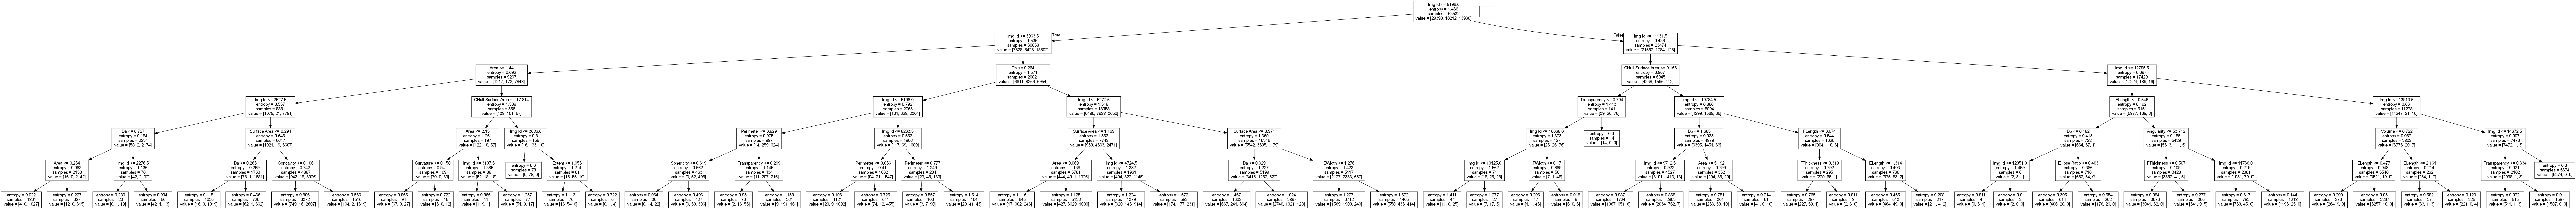

In [69]:
import io
import pydotplus

from IPython.display import Image  

dot_data = io.StringIO()  

tree.export_graphviz(
    dt,
    out_file=dot_data,  
    feature_names=FEATURES
)  

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  

Image(graph.create_png())

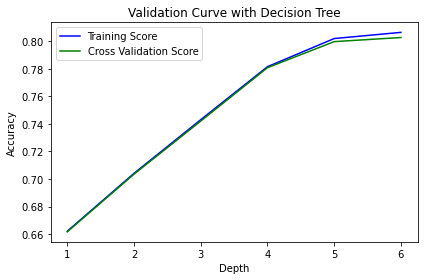

In [70]:
# evaluate decision tree performance on train and test sets with different tree depths
from sklearn.tree import DecisionTreeClassifier
from matplotlib import pyplot
from sklearn.model_selection import validation_curve
from sklearn.model_selection import cross_validate, ShuffleSplit

# frac_list = []
# acc_list_frac = []
# for i in df.count():
#   dt.fit(x_train, y_train)
#   y_pred = dt.predict(x_test)
#   acc = metrics.accuracy_score(y_test, y_pred)
#   acc_list_frac.append(acc)
#   frac_list.append(i)

max_depth = [1,2,3,4,5,6]
train_score, test_score = validation_curve(DecisionTreeClassifier(), x_train, y_train,
                                       param_name = "max_depth",
                                       param_range = max_depth,
                                        cv = 10, scoring = "accuracy")

# Calculating mean and standard deviation of training score
mean_train_score = np.mean(train_score, axis = 1)
std_train_score = np.std(train_score, axis = 1)
 
# Calculating mean and standard deviation of testing score
mean_test_score = np.mean(test_score, axis = 1)
std_test_score = np.std(test_score, axis = 1)
 
# Plot mean accuracy scores for training and testing scores
plt.plot(max_depth, mean_train_score,
     label = "Training Score", color = 'b')
plt.plot(max_depth, mean_test_score,
   label = "Cross Validation Score", color = 'g')
 
# Creating the plot
plt.title("Validation Curve with Decision Tree")
plt.xlabel("Depth")
plt.ylabel("Accuracy")
plt.tight_layout()
plt.legend(loc = 'best')
plt.show()